In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.utils import resample

In [2]:
df = pd.read_csv(filepath_or_buffer='notencsv2.csv', delimiter=';')

In [3]:
#read dataframe
df.head()

,zivilrecht,strafrecht,verwaltungsrecht
0,3,6.0,2.0
1,3,3.0,3.0
2,5,5.0,3.0
3,6,11.0,3.0
4,3,6.0,2.0


In [4]:
#convert col with int to float
df['zivilrecht'] = pd.to_numeric(df['zivilrecht'], downcast='float')

In [5]:
#check back
df

,zivilrecht,strafrecht,verwaltungsrecht
0,3.0,6.0,2.0
1,3.0,3.0,3.0
2,5.0,5.0,3.0
3,6.0,11.0,3.0
4,3.0,6.0,2.0
5,3.0,3.0,6.0
6,3.0,6.0,5.0
7,4.0,7.0,5.0
8,7.0,6.0,10.0
9,5.0,6.0,5.0


In [6]:
df.describe()

,zivilrecht,strafrecht,verwaltungsrecht
count,36.000000,28.000000,26.000000
mean,4.916667,6.464286,4.807692
std,2.102719,1.952816,1.918734
min,2.000000,3.000000,2.000000
25%,3.750000,5.000000,3.250000
50%,4.000000,6.000000,5.000000
75%,6.250000,8.000000,5.750000
max,12.000000,11.000000,10.000000


In [7]:
strafrecht = df['strafrecht'].dropna()
zivilrecht = df['zivilrecht'].dropna()
verwaltungsrecht = df['verwaltungsrecht'].dropna()
val_str = strafrecht.values
val_zv = zivilrecht.values
val_vr = verwaltungsrecht.values

In [8]:
stationen = [val_str, val_zv, val_vr]

In [9]:
#draws one bootstrap sample with number of draws equal to list size and calculates mean. Takes station as argument.
def bootstrapper(x):
    rd_seed = rd.randint(0,100000000)
    one_iter = resample(x, replace=True, random_state=rd_seed)
    one_iter_mean = one_iter.sum()/len(one_iter)
    return one_iter_mean

In [10]:
def sampler(station):
    samples = []
    for n in range(10000):
        samples.append(bootstrapper(station))
    return samples    

In [11]:
def drawplot(st_resampled):
    x = pd.Series(st_resampled, name="Means")
    sns.set()
    sns.distplot(x)
    

count    10000.000000
mean         6.461357
std          0.364157
min          4.928571
25%          6.214286
50%          6.464286
75%          6.714286
max          7.821429
Name: Means, dtype: float64
(5.747622602469785, 7.175091683244498)
count    10000.000000
mean         4.918697
std          0.347618
min          3.805556
25%          4.666667
50%          4.916667
75%          5.138889
max          6.500000
Name: Means, dtype: float64
(4.237377561144021, 5.600016883300422)
count    10000.000000
mean         4.809727
std          0.369205
min          3.500000
25%          4.538462
50%          4.807692
75%          5.038462
max          6.269231
Name: Means, dtype: float64
(4.086099284648586, 5.533354561505261)


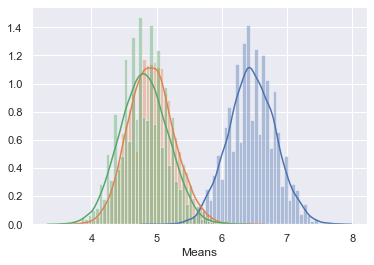

In [12]:
for station in stationen:
    #kickstart sampler
    st_resampled = sampler(station)
    series = pd.Series(st_resampled, name="Means")
    drawplot(series)
    print(series.describe())
    print(sp.stats.norm.interval(.95, loc=series.mean(), scale=series.std()))

In [13]:
x = pd.Series(samples, name="Means")
sns.set()
sns.distplot(x);

NameError: name 'samples' is not defined

In [ ]:
x.describe()

In [ ]:
#assuming normal distribution
sp.stats.norm.interval(.95, loc=x.mean(), scale=x.std())

In [ ]:
#checking back interval with two std deviations from observed mean
two_sigma = x.std()*2
start = x.mean() - two_sigma
stop = x.mean() + two_sigma
print(start, stop)

In [ ]:
41/7